## Purpose of the Project

- Using data from Taarifa and the Tanzanian Ministry of Water, we need to predict which pumps are functional, which need some repairs, and which don't work at all

### Dataset Information
##### Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# let's load the training values dataset and parse the date
train_values = pd.read_csv('B:/01. Projects/DrivenData/Pump_it_up/Data/Training_set_values.csv',parse_dates=['date_recorded'])

In [3]:
# For better understanding we will visualize every column
pd.pandas.set_option('display.max_columns', None)

In [4]:
train_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
# let's load the training labels dataset
train_labels = pd.read_csv('B:/01. Projects/DrivenData/Pump_it_up/Data/Training_set_labels.csv')

In [6]:
train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [7]:
# let's merge values and labels of training dataset
train_df = pd.merge(train_values,train_labels, on='id')

In [8]:
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


- From above Datafframe we can clearly see that **"funder and installer"** are having same details so, we can remove anyone.
- **"num_private"** needs to be check for its unique values as all visible values are **0**.
- **"extraction_type", "extraction_type_group" and "extraction_type_class"** feature are having many similar values so need to check with its unique values.
- **"scheme_management", "management" and "management_group"** is having almost similar values so, we need to analyze and reduce the dimensionality.
- **"payment" and "payment_type"**, **"water_quality" and "quality_group"** , **"quantity" and "quantity_group"** , **"source" and "source_type"** , **"waterpoint_type" and "waterpoint_type_group"** are columns with similar values with each other so need to reduce the dimensionality by analyzing those.
- **"construction_year"** is having many values as **0** so need to handle those.

##### Also, we need to check for null values 

In [9]:
# Before proceeding ahead it's important to look at the null values
train_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

- **Scheme_name** is having around 50% of null values so, its better to remove that column.
- **funder, installer,scheme_management,permit,subvillage** are also having various null values.


In [10]:
df = train_df.copy()

In [11]:
df.drop(columns = ['recorded_by','region','id','num_private','funder','scheme_name','extraction_type', 'extraction_type_group','scheme_management','payment','quality_group','quantity_group','source_type','waterpoint_type_group'],inplace = True)

In [12]:
df

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,20,2,Serengeti,Natta,280,NaN,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,True,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,3,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional
59396,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,11,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,annually,soft,enough,river,surface,communal standpipe,functional
59397,0.0,2011-04-11,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,12,7,Mbarali,Chimala,0,True,False,0,handpump,vwc,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional
59398,0.0,2011-03-08,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,1,4,Chamwino,Mvumi Makulu,0,True,True,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional


In [13]:
# Selecting all categorical column
df_cat = df.select_dtypes(include='object')

In [14]:
#getting the list of unique values and number of unique values of all categorical columns
for col in df_cat:
    a= df_cat[col].nunique()
    b= df_cat[col].unique()
    print(col)
    print(a)
    print(b)

installer
2145
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
wpt_name
37400
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
basin
9
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
subvillage
19287
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
lga
125
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Kondoa' 'Kilolo' 'Kibondo' 'Makete'
 'Singida Rural' 'Masasi' 'Rungwe' 'Moshi Urban' 'Geita' 'Mbulu'
 'Bukoba Rural' 'Muheza' 'Lushoto' 'Meru' 'Iramba' 'Kilombero' 'Mbarali'
 'Kasulu' 'Bukoba Urban' 'Korogwe' 'Bukombe' 'Morogoro Rural' 'Kishapu'
 'Musoma Rural' 'S

In [15]:
'payment_type','water_quality','quantity','source','waterpoint_type'

('payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type')

- From above result we can say that we need to encode all of the above categorical columns.
- **status_group, source_class, public_meeting, permit, management_group** are columns with less than 5 unique values so for these we can definitely use onehotencoding.
- For rest of the columns we can go with target encoding.

In [16]:
df.isna().sum()

amount_tsh                  0
date_recorded               0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
basin                       0
subvillage                371
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source                      0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

In [17]:
# Now as nan values are very less we can drop those rows

In [18]:
df.dropna(inplace=True)

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.isna().sum()

amount_tsh               0
date_recorded            0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [21]:
# Yay!! it's done

In [22]:
df

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
2,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
3,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,True,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional
4,20.0,2011-03-13,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,4,8,Mkinga,Moa,1,True,True,2009,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51720,500.0,2011-03-09,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,5,6,Mvomero,Diongoya,89,True,True,2007,submersible,vwc,user-group,monthly,soft,enough,machine dbh,groundwater,communal standpipe,non functional
51721,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,3,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional
51722,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,11,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,annually,soft,enough,river,surface,communal standpipe,functional
51723,0.0,2011-03-08,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,1,4,Chamwino,Mvumi Makulu,0,True,True,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional


In [23]:
'gps_height','amount_tsh','longitude','latitude','region_code','district_code','population','construction_year'

('gps_height',
 'amount_tsh',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year')

### EDA

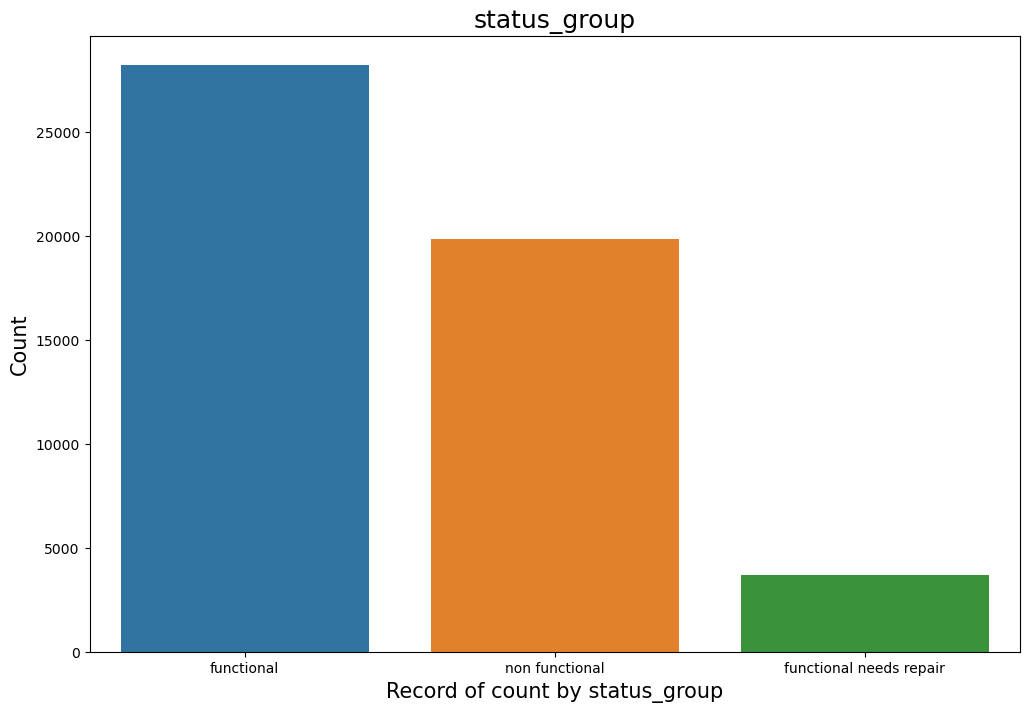

In [24]:
# create a countplot for number of fraud and non-fraud transactions

plt.figure(figsize=(12,8))
sns.countplot(x ='status_group',data=df)
plt.title('status_group',fontsize = 18)
plt.xlabel('Record of count by status_group',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [25]:
categorical_features = ['source', 'source_class', 'public_meeting', 'permit', 'management_group','extraction_type_class','payment_type','water_quality','quantity','waterpoint_type']

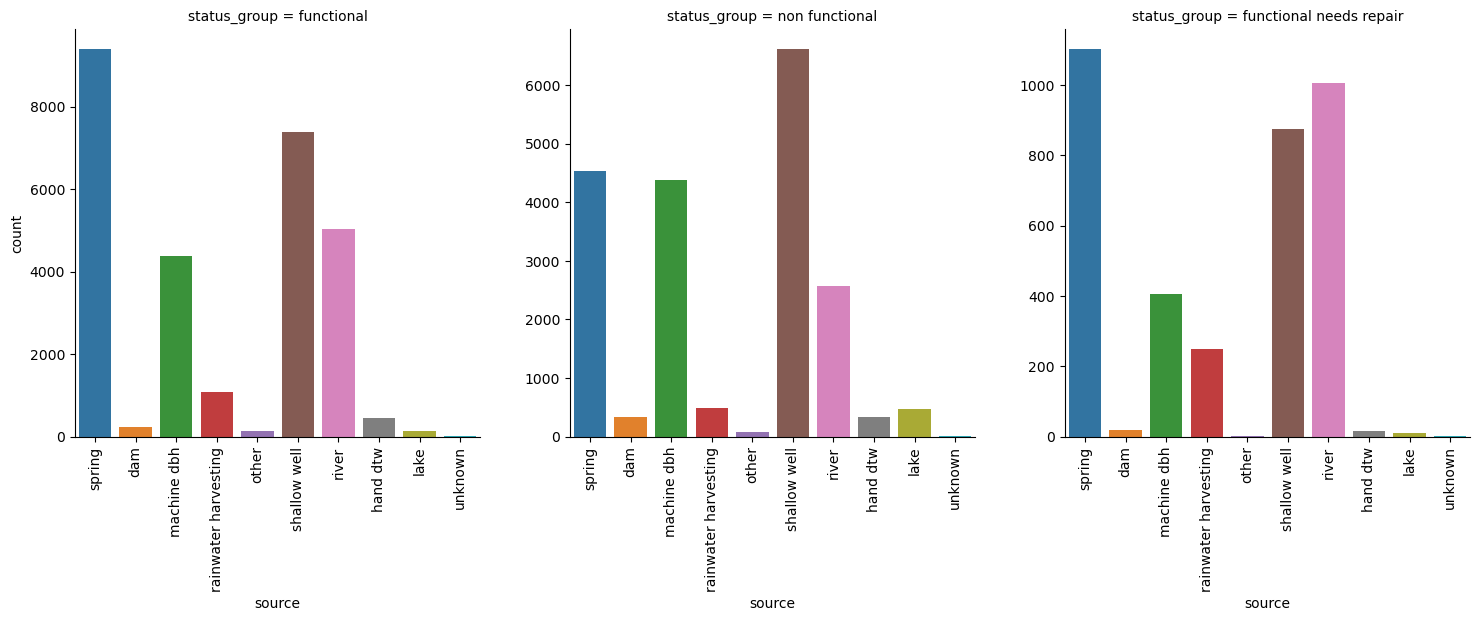

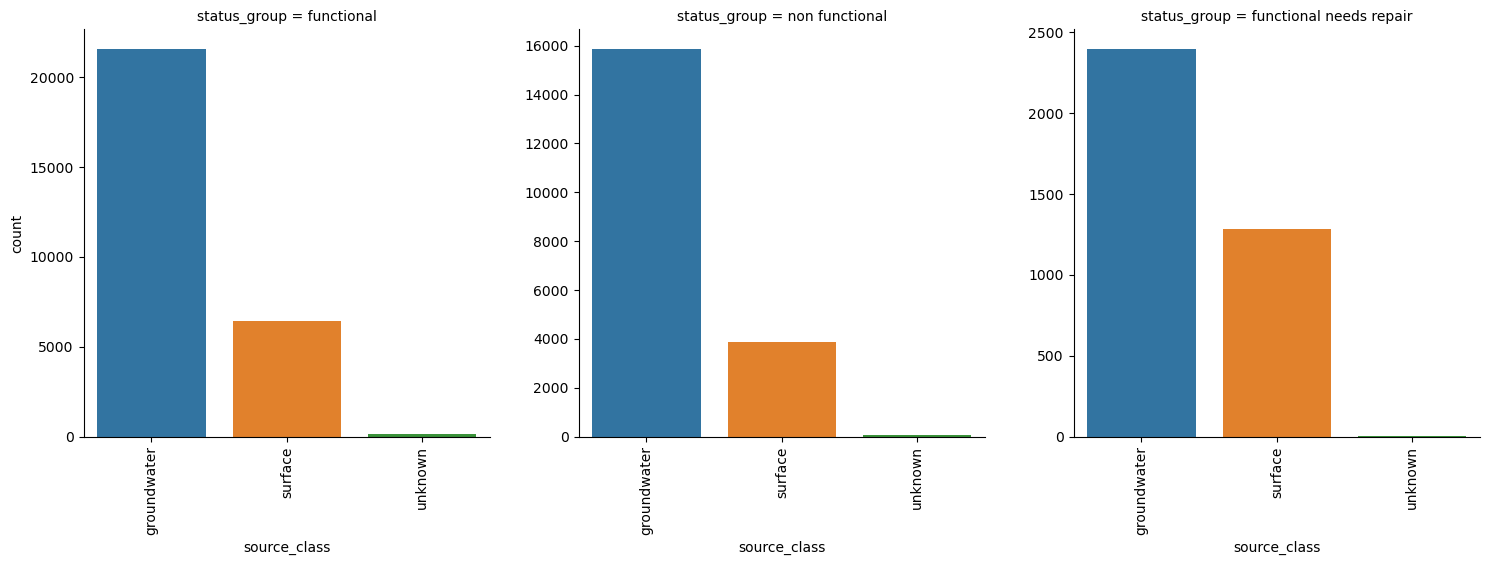

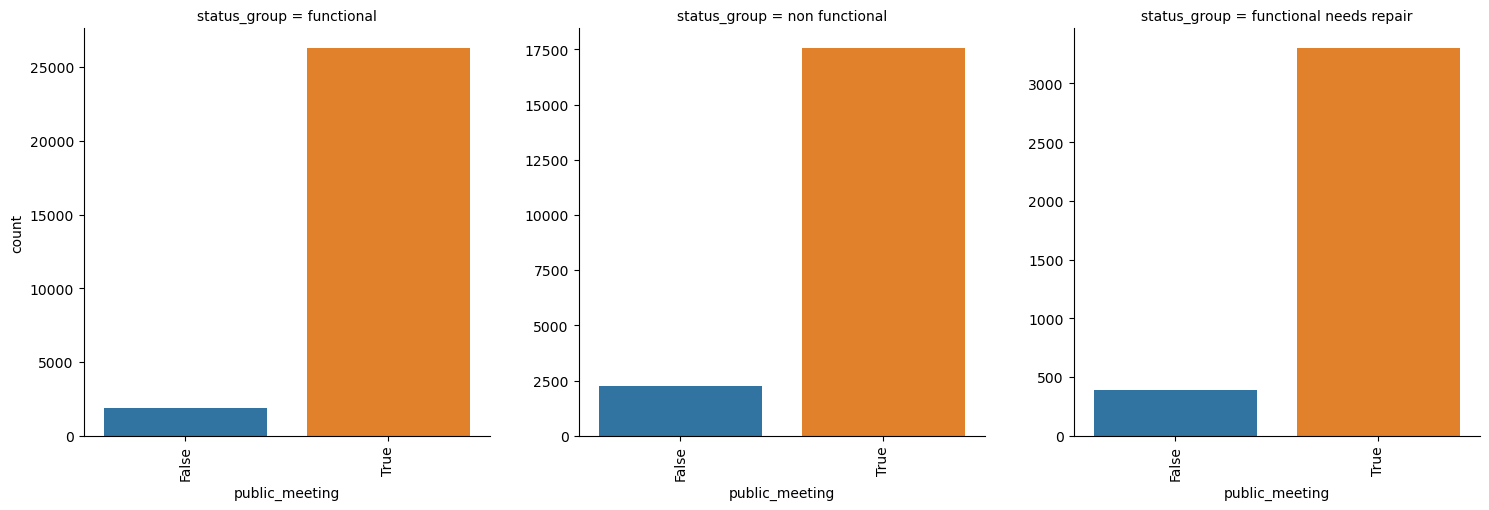

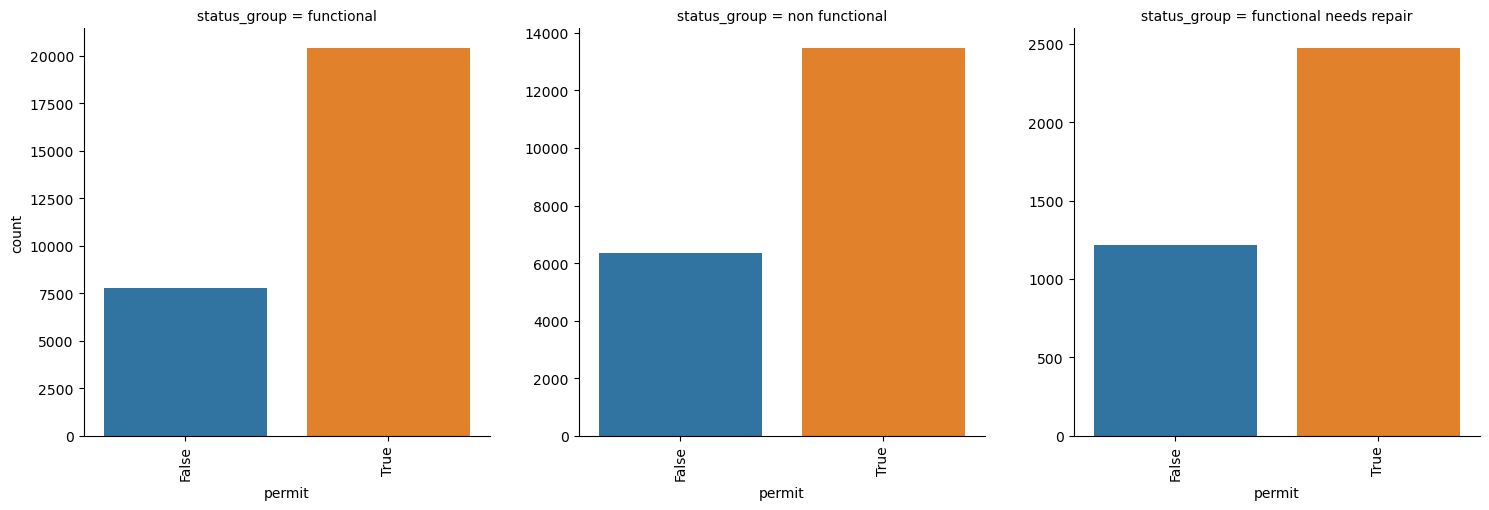

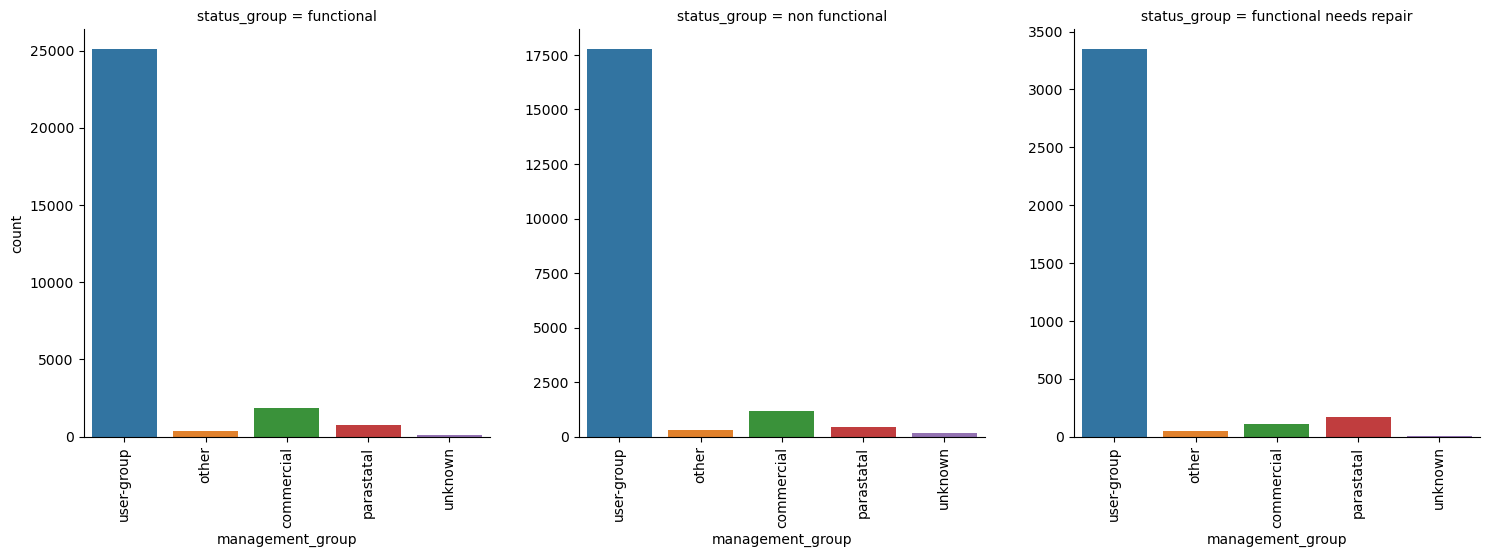

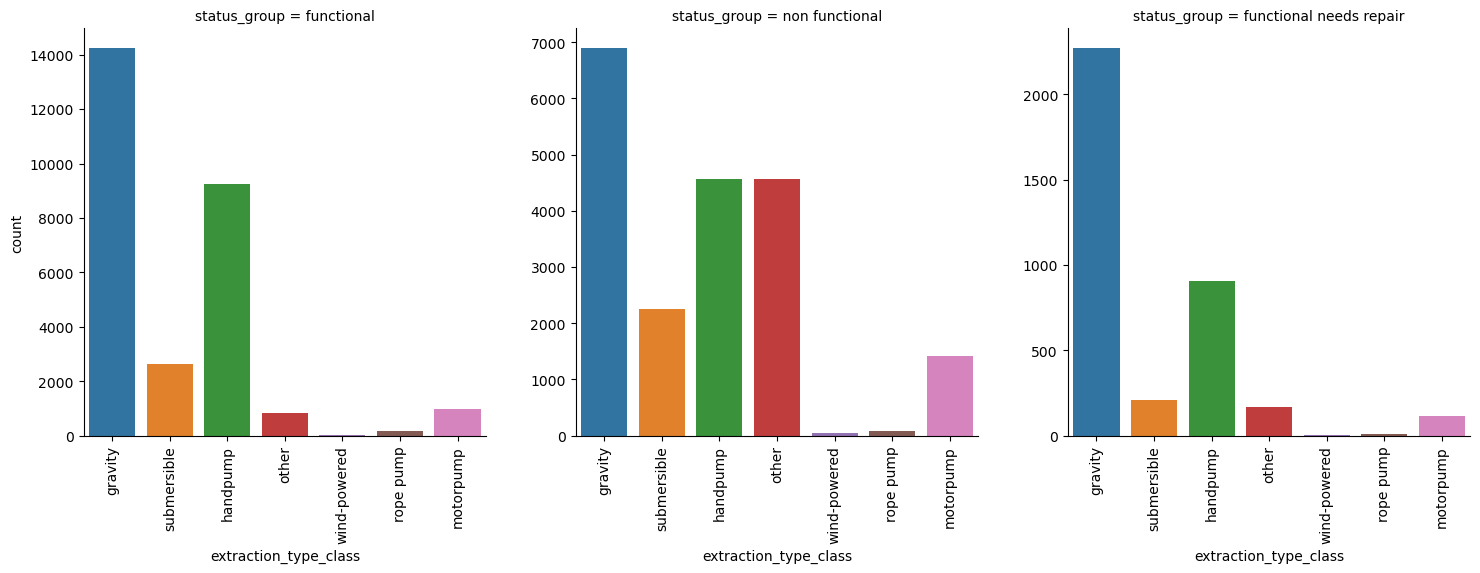

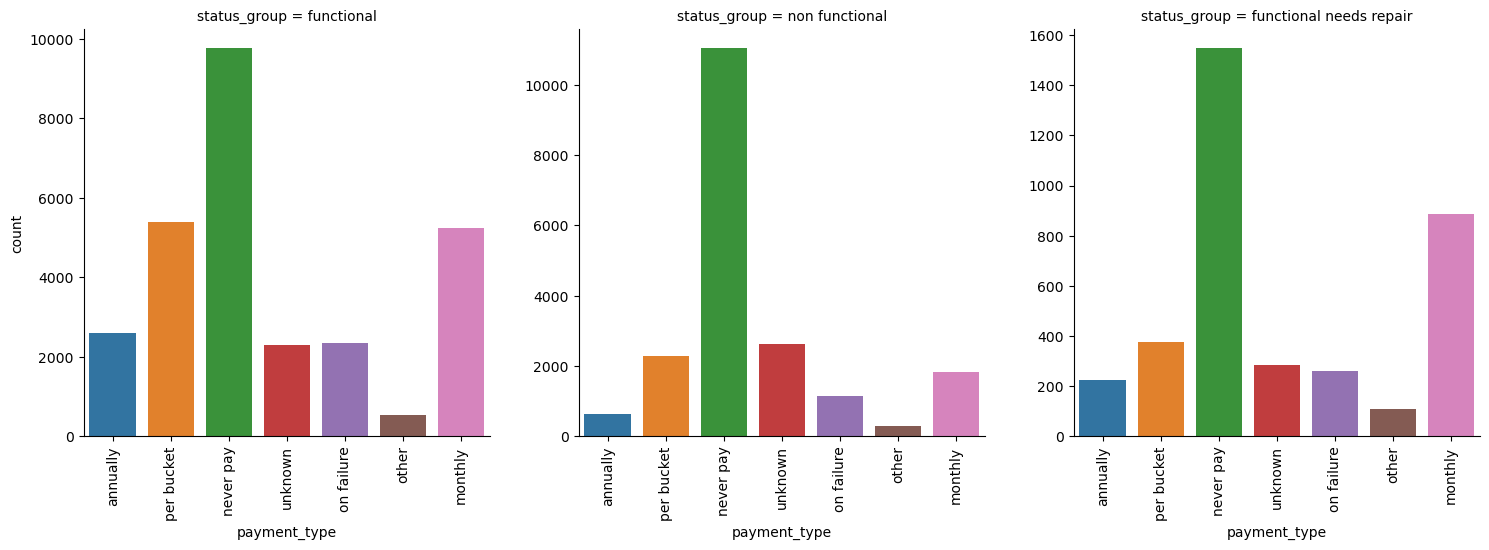

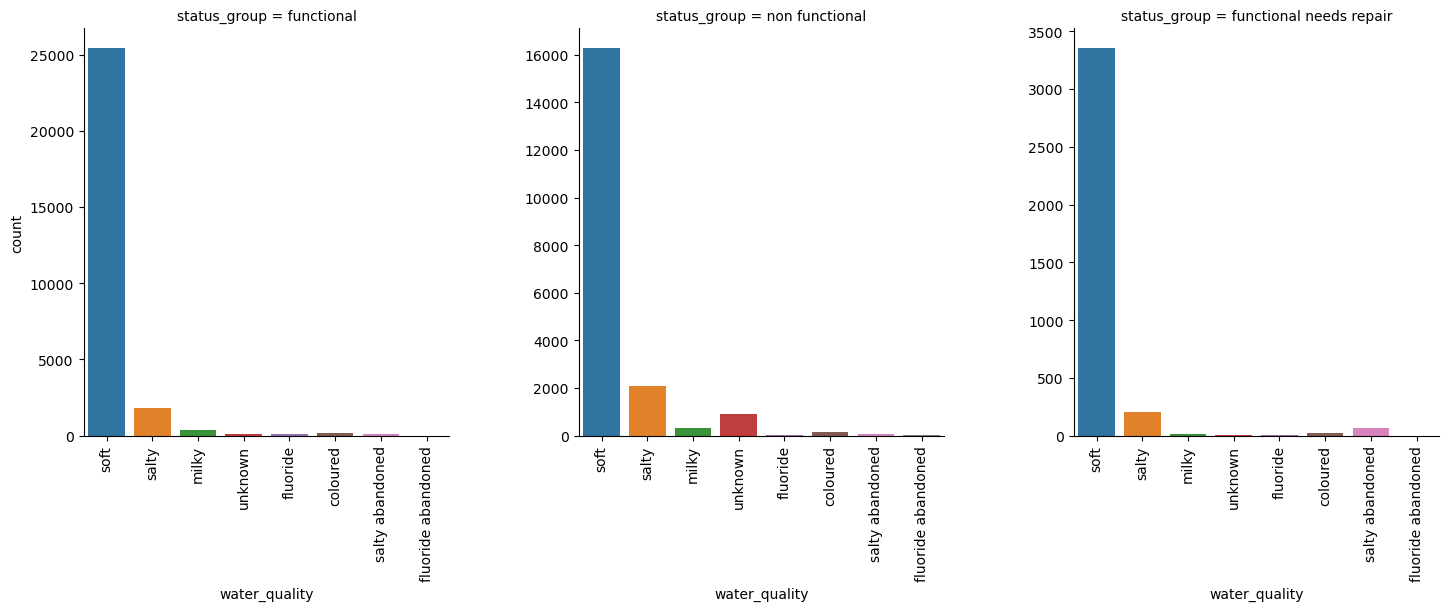

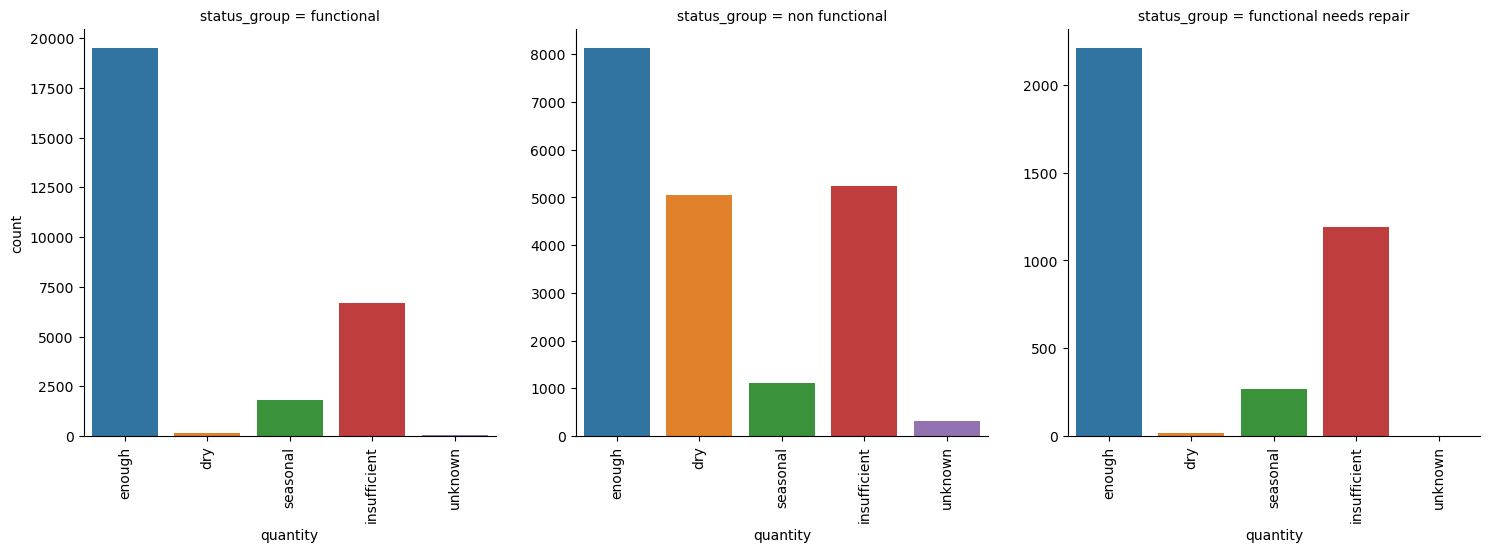

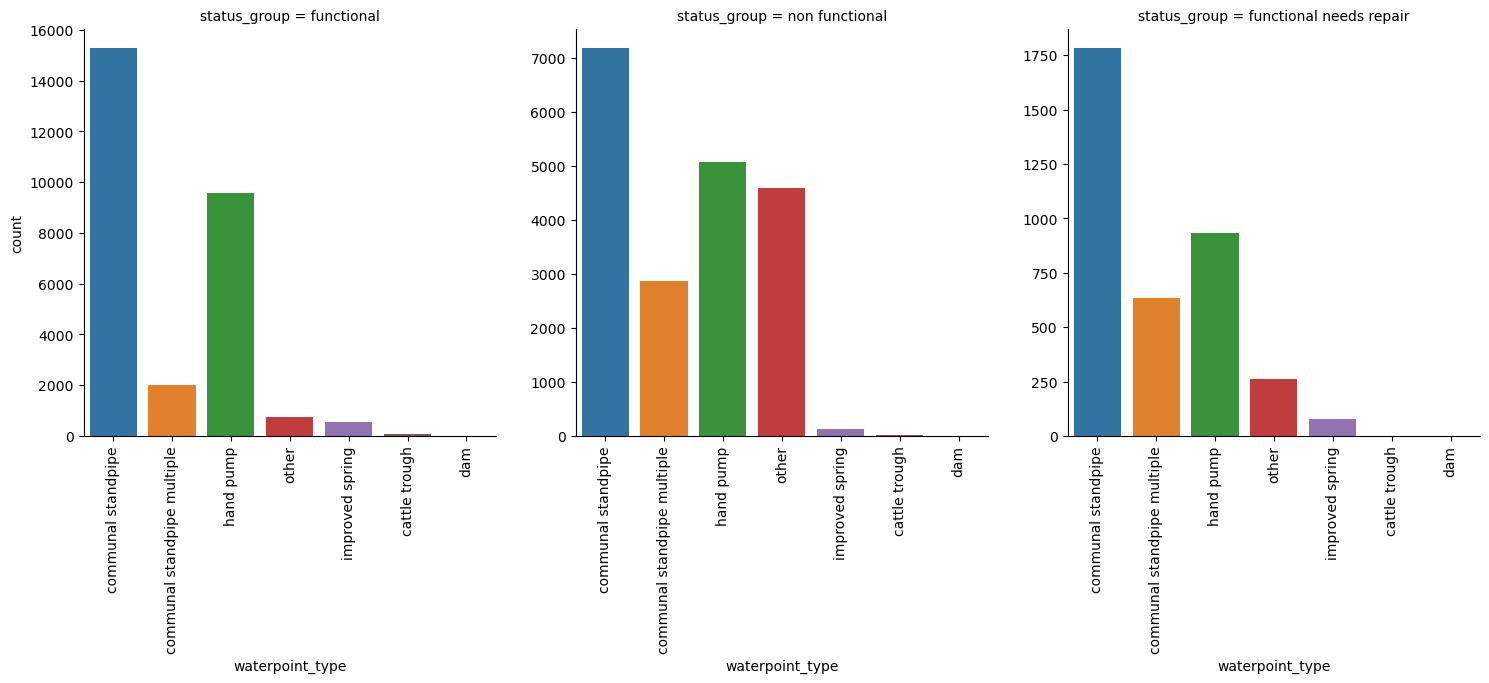

In [26]:
# Categorical plot of all categorical_features as per target values
for feature in categorical_features:
    g = sns.catplot(x=feature, col='status_group', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=90)
    
    plt.show()

#### Observations
- **source** of pumps as per **status_group** is mostly distributed in spring, machine dbh, shallow_well and river.
- **source_class, public_meeting, permit, management_group** is having almost same distribution ratio in every **status_group**


In [27]:
continuous_features = ['gps_height','amount_tsh','longitude','latitude','population','construction_year']

In [28]:
# # Histograms for continuous features as per target
# for feature in continuous_features:
#     fig,axs = plt.subplots(figsize=(22,9))
#     sns.histplot(df[df['status_group']=='functional'][feature],color = 'red')
#     sns.histplot(df[df['status_group']=='non functional'][feature],color = 'blue')
#     sns.histplot(df[df['status_group']=='functional needs repair'][feature],color = 'green')
    
#     plt.legend([0,1,2],loc='upper right')
#     plt.show()

In [29]:
# # Boxplot of continuous features
# for i in range(len(continuous_features)):
#     feature = continuous_features[i]
#     plt.figure(figsize = (10, 5))
#     sns.boxplot(x='status_group',y=continuous_features[i],data=df);

# import scipy.stats as stats


In [30]:
df[df['construction_year']!=0]

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
2,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,20.0,2011-03-13,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,4,8,Mkinga,Moa,1,True,True,2009,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional
9,0.0,2011-02-20,62,Private,39.209518,-7.034139,Mzee Hokororo,Wami / Ruvu,Mizugo,60,43,Mkuranga,Tambani,345,True,False,2011,submersible,private operator,commercial,never pay,salty,enough,machine dbh,groundwater,other,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51717,0.0,2013-08-03,540,Government,38.044070,-4.272218,Kwa,Pangani,Maore Kati,3,3,Same,Maore,210,True,True,1967,gravity,vwc,user-group,never pay,soft,enough,river,surface,communal standpipe,non functional
51720,500.0,2011-03-09,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,5,6,Mvomero,Diongoya,89,True,True,2007,submersible,vwc,user-group,monthly,soft,enough,machine dbh,groundwater,communal standpipe,non functional
51721,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,3,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional
51722,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,11,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,annually,soft,enough,river,surface,communal standpipe,functional


- As we know that in almost 1/3rd of the data construction year is marked as zero so.
- And construction_year can come in as the most important factor for status_group, so it is iportant to impute these values..

### Feature Engineering

- Now we need a feature which can determine the no of years passed since the installation.
- For the same we need to analyze the construction_year and impute the values having 0 with some relevant values.

In [31]:
df[df['construction_year']!=0][df['status_group']=='non functional']

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\2089147764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['construction_year']!=0][df['status_group']=='non functional']


,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
2,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
15,500.0,2011-07-04,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,Rufiji,Kidudumo,11,4,Njombe,Mdandu,35,True,True,1978,gravity,wua,user-group,monthly,soft,dry,river,surface,communal standpipe,non functional
16,0.0,2011-09-04,1656,DWE,34.569266,-9.085515,Kwa Rose Chaula,Rufiji,Yeriko,11,4,Njombe,Usuka,50,True,True,1978,gravity,wua,user-group,on failure,soft,dry,river,surface,communal standpipe,non functional
25,0.0,2013-03-05,1443,District council,37.611126,-3.263526,Kwa Kibakaya,Pangani,Kiyao,3,1,Rombo,Mengwe Manda,1,True,True,2000,gravity,company,commercial,monthly,soft,insufficient,spring,groundwater,communal standpipe,non functional
31,0.0,2013-03-28,1546,Not known,36.618699,-3.293003,Sekondari,Pangani,Afya,2,2,Arusha Rural,Oltrumet,200,True,True,2000,other,vwc,user-group,never pay,soft,seasonal,rainwater harvesting,surface,other,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,6000.0,2011-03-14,1439,Roman,34.942101,-9.849198,none,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,50,True,False,1999,gravity,vwc,user-group,annually,soft,dry,spring,groundwater,communal standpipe,non functional
51708,0.0,2011-03-16,0,DWE,38.835001,-4.880204,Mijohoroni,Pangani,Mtakuja A,4,8,Mkinga,Maramba,360,True,True,1992,gravity,vwc,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe,non functional
51709,6.0,2013-08-03,1383,DWE,37.454759,-3.323599,Kwa Luka Msaki,Pangani,Yamu Juu,3,4,Moshi Rural,Kirua Vunjo Kusini,1,True,True,2008,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,non functional
51717,0.0,2013-08-03,540,Government,38.044070,-4.272218,Kwa,Pangani,Maore Kati,3,3,Same,Maore,210,True,True,1967,gravity,vwc,user-group,never pay,soft,enough,river,surface,communal standpipe,non functional


C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3521561987.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='non functional']['construction_year'],color = 'red');
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3521561987.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g.axvline(df[df['construction_year']!=0][df['status_group']=='non functional']['construction_year'].mean(),color = 'blue')
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3521561987.py:3: UserWarning: Boolean Series key will be reind

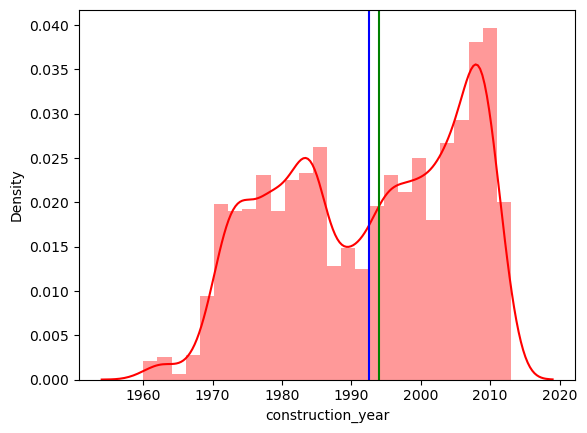

In [32]:
g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='non functional']['construction_year'],color = 'red');
g.axvline(df[df['construction_year']!=0][df['status_group']=='non functional']['construction_year'].mean(),color = 'blue')
g.axvline(df[df['construction_year']!=0][df['status_group']=='non functional']['construction_year'].median(),color = 'green')

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\775428308.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='functional']['construction_year'],color = 'red');
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\775428308.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g.axvline(df[df['construction_year']!=0][df['status_group']=='functional']['construction_year'].mean(),color = 'blue')
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\775428308.py:3: UserWarning: Boolean Series key will be reindexed to mat

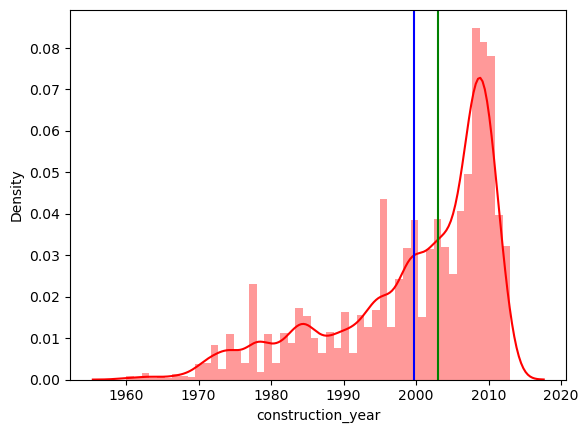

In [33]:
g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='functional']['construction_year'],color = 'red');
g.axvline(df[df['construction_year']!=0][df['status_group']=='functional']['construction_year'].mean(),color = 'blue')
g.axvline(df[df['construction_year']!=0][df['status_group']=='functional']['construction_year'].median(),color = 'green')

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\4080662696.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='functional needs repair']['construction_year'],color = 'red');
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\4080662696.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g.axvline(df[df['construction_year']!=0][df['status_group']=='functional needs repair']['construction_year'].mean(),color = 'blue');
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\4080662696.py:3: UserWarning: Boolean Serie

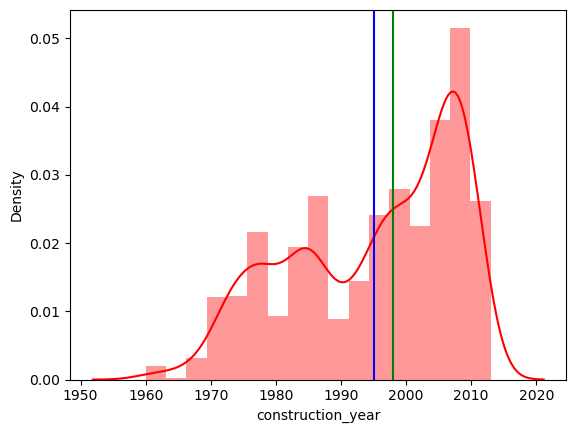

In [34]:
g = sns.distplot(df[df['construction_year']!=0][df['status_group']=='functional needs repair']['construction_year'],color = 'red');
g.axvline(df[df['construction_year']!=0][df['status_group']=='functional needs repair']['construction_year'].mean(),color = 'blue');
g.axvline(df[df['construction_year']!=0][df['status_group']=='functional needs repair']['construction_year'].median(),color = 'green');

- As visualized that in all of the status_group construction_year is having skewed data so, we will impute 0 values in construction_year as the median values according to the status_group.

In [35]:
# Firstly we will divide the dataframe as per the status group so that we can impute the construction_year values.

In [36]:

df_fuctional = df[df['status_group']=='functional']
df_non_fuctional = df[df['status_group']=='non functional']
df_repair = df[df['status_group']=='functional needs repair']



In [37]:
def zero_to_median(df,col):
    
    # convert 0 to nan
    df[col].replace(0,np.nan,inplace=True)
    
    # NaN to median
    df[col].fillna(round(df[col].median(),0),inplace=True)
    

In [38]:

zero_to_median(df_fuctional,'construction_year')
zero_to_median(df_non_fuctional,'construction_year')
zero_to_median(df_repair,'construction_year')


df_up = pd.concat([df_non_fuctional,df_repair,df_fuctional],ignore_index= True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3569963417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(0,np.nan,inplace=True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3569963417.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(round(df[col].median(),0),inplace=True)


In [39]:
from datetime import datetime

In [40]:

def year_passed(df):
    df['construction_year'] = pd.to_datetime(df['construction_year'].astype(int),format ='%Y')
    df['date_recorded'] = pd.to_datetime(df['date_recorded'].astype(str),format ='%Y-%m-%d')
    df['year_recorded'] = df['date_recorded'].dt.year
    df['construction_year']=df['construction_year'].dt.year
    df['years_passed'] = df['year_recorded'] - df['construction_year']
    df.drop(columns = ['date_recorded','year_recorded','construction_year'], inplace = True)
  

In [41]:
year_passed(df_up)

In [42]:
df_up

,amount_tsh,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,years_passed
0,0.0,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,27
1,0.0,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,17,3,Shinyanga Rural,Samuye,0,True,True,handpump,vwc,user-group,never pay,soft,enough,machine dbh,groundwater,hand pump,non functional,18
2,0.0,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,17,3,Kahama,Chambo,0,True,True,handpump,wug,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,non functional,18
3,0.0,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,Lake Tanganyika,Imalauduki,14,6,Tabora Urban,Itetemia,0,True,True,handpump,vwc,user-group,never pay,salty,seasonal,machine dbh,groundwater,hand pump,non functional,18
4,500.0,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,Rufiji,Kidudumo,11,4,Njombe,Mdandu,35,True,True,gravity,wua,user-group,monthly,soft,dry,river,surface,communal standpipe,non functional,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51720,0.0,0,Private,33.866852,-4.287410,Kwa Peter,Internal,Masanga,14,2,Igunga,Igunga,0,False,False,gravity,private operator,commercial,per bucket,soft,insufficient,dam,surface,other,functional,9
51721,10.0,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,3,5,Hai,Masama Magharibi,125,True,True,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional,14
51722,4700.0,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,11,4,Njombe,Ikondo,56,True,True,gravity,vwc,user-group,annually,soft,enough,river,surface,communal standpipe,functional,15
51723,0.0,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,1,4,Chamwino,Mvumi Makulu,0,True,True,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional,8


In [43]:
# let's load the training labels dataset
test_values = pd.read_csv('B:/01. Projects/DrivenData/Pump_it_up/Data/Test_set_values.csv',parse_dates=['date_recorded'])

C:\Users\Viren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Viren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '27-03-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Viren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '25-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Viren\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '23-01-2013' in DD/MM/YYYY format. Provide format or specif

In [44]:
cols = list(set(df_up.columns) - set(['status_group','years_passed']))
cols = cols + ['construction_year','date_recorded']

In [45]:
df_test = test_values[cols]
df_test.isna().sum()

for col in df_test.columns[df_test.isna().sum() > 0]:
    mode = df_test[col].mode()[0]
    df_test[col].fillna(value = mode, inplace = True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\863884944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col].fillna(value = mode, inplace = True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\863884944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col].fillna(value = mode, inplace = True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\863884944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tes

In [46]:
zero_to_median(df_test,'construction_year')

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3569963417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace(0,np.nan,inplace=True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3569963417.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(round(df[col].median(),0),inplace=True)


In [47]:
year_passed(df_test)

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3837230210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['construction_year'] = pd.to_datetime(df['construction_year'].astype(int),format ='%Y')
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3837230210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_recorded'] = pd.to_datetime(df['date_recorded'].astype(str),format ='%Y-%m-%d')
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3837230210.py:4: SettingWithCopyWarning: 
A value is trying

### Encoding
- Now it's go for Encoding Part

In [48]:
df_up['status_group'] = df_up['status_group'].replace(['functional','non functional','functional needs repair'],[0,1,2])

In [49]:
df_up['public_meeting'] = df_up['public_meeting'].astype(str).replace(['True','False'],[0,1])
df_up['permit'] = df_up['permit'].astype(str).replace(['True','False'],[0,1])


df_test['public_meeting'] = df_test['public_meeting'].astype(str).replace(['True','False'],[0,1])
df_test['permit'] = df_test['permit'].astype(str).replace(['True','False'],[0,1])

C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\4245036058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['public_meeting'] = df_test['public_meeting'].astype(str).replace(['True','False'],[0,1])
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\4245036058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['permit'] = df_test['permit'].astype(str).replace(['True','False'],[0,1])


In [50]:
from category_encoders import TargetEncoder
from category_encoders import LeaveOneOutEncoder

encoder = LeaveOneOutEncoder()
en_col = ['wpt_name','installer','basin','subvillage','lga','ward','extraction_type_class','management','payment_type','water_quality','quantity','source','source_class','waterpoint_type','management_group']


for col in en_col:
    df_up[str(col)+'_encoded'] = encoder.fit_transform(df_up[col].values,df_up['status_group']) # TRAINING SET
    df_test[str(col)+'_encoded'] = encoder.transform(df_test[col].values) # TEST SET
    df_up.drop(columns=col, inplace=True) # TRAINING SET
    df_test.drop(columns=col, inplace=True) # TEST SET


C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3090133277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[str(col)+'_encoded'] = encoder.transform(df_test[col].values) # TEST SET
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3090133277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=col, inplace=True) # TEST SET
C:\Users\Viren\AppData\Local\Temp\ipykernel_5360\3090133277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [51]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# ohe_cols = ['management_group']
# # ONE HOT ENCODING TRAINING SET
# df_new = df_up[ohe_cols]
# x = ohe.fit_transform(df_new)
# df1 = pd.DataFrame(x)
# df_up = pd.concat([df_up, df1], axis=1)
# df_up.drop(columns=ohe_cols, inplace=True)

# # ONE HOT ENCODING TEST SET
# df_new1 = df_test[ohe_cols]
# x1 = ohe.transform(df_new1)
# df2 = pd.DataFrame(x1)
# df_test = pd.concat([df_test, df2], axis = 1)
# df_test.drop(columns=ohe_cols, inplace=True)


### Modelling

In [52]:
X

NameError: name 'X' is not defined

In [ ]:
# Spilliting in to x and y
X = df_up.drop(columns =['status_group'])
y = df_up['status_group']

In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 42)

In [ ]:
# # hereby we have used column transformer, pipeline and different metrics
# # Column transformer will help in applying various transitions on columns in single step
# # Pipeline will help to apply various step in single command
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

# ohe = OneHotEncoder()

# column_trans = make_column_transformer((OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),['public_meeting', 'permit', 'management_group']),
#                                        remainder = 'passthrough')


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0) 

In [ ]:
# creating pipeline
pipe = make_pipeline(column_trans,model)

In [ ]:
#Fit the pipeline with training set
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Accuracy_test = accuracy_score(y_pred,y_test)
print('Accuracy of Test Data is:',Accuracy_test)

print('----------------------------------------')
print('----------------------------------------')
print('classification_report:')

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y.value_counts())
print(y_resampled.value_counts())

In [ ]:
smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_train_resampled, y_train_resampled = smote_train.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_train_resampled.value_counts())

In [ ]:
clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1)
scores = cross_val_score(clf_xg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(scores.mean(), '+/-', scores.std())

In [ ]:
clf_xg.fit(X_resampled, y_resampled)


In [ ]:
preds_train_resampled = clf_xg.predict(X_train_resampled)
preds_train = clf_xg.predict(X_train)
preds_test = clf_xg.predict(X_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_train_resampled, preds_train_resampled))
cm = confusion_matrix(y_train_resampled, preds_train_resampled)
print(classification_report(y_train_resampled,preds_train_resampled))

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, preds_test))
cm = confusion_matrix(y_test, preds_test)
print(classification_report(y_test,preds_test))

In [ ]:
df_test

In [ ]:
preds_main_test = clf_xg.predict(df_test[X_train.columns])
submission_preds = pd.Series(preds_main_test)

In [ ]:
submission_preds.value_counts()

In [ ]:
submission_preds_mapped = submission_preds.map({2: 'functional', 1: 'functional needs repair', 0: 'non functional'})
submission_preds_mapped.value_counts()

In [ ]:
submit_df = pd.concat([test_values['id'], submission_preds_mapped], axis = 1)
submit_df.rename(columns = {0: 'status_group'}, inplace = True)
submit_df.head()

In [ ]:
submit_df.to_csv('submission.csv', index = False)

In [ ]:
from imblearn.pipeline import Pipeline


In [ ]:
# Import the libraries for SMOTE and fit the X and y to resample the data

from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# print(y.value_counts())
# print(y_resampled.value_counts())
# smote = SMOTE()

# fit predictor and target variable
pipeline = Pipeline(steps=[('preprocessor', column_trans),
                            ('smote', smote),
                            ('model', model)
                          ])


#Fit the pipeline with training set
pipeline.fit(X_train,y_train)

# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_smote))

# df_1 = pd.concat([y_smote, x_smote], axis=1)

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
df_test

In [ ]:
test_pred = pipe.predict(df_test)

In [ ]:
submission_preds = pd.Series(test_pred)

In [ ]:
submission_preds.value_counts()

In [ ]:
submission_preds_mapped = submission_preds.map({2: 'functional', 1: 'functional needs repair', 0: 'non functional'})
submission_preds_mapped.value_counts()

In [ ]:
submit_df = pd.concat([test_values['id'], submission_preds_mapped], axis = 1)
submit_df.rename(columns = {0: 'status_group'}, inplace = True)
submit_df.head()

In [ ]:
submit_df.to_csv('submission.csv', index = False)